<a href="https://colab.research.google.com/github/Mmbsaksd/Credit-Card-Default-Prediction---Capstone-Project/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

#**Data Preprocessing**

##**Importing Libraries And Dataset**

In [ ]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#Loading the datasets
df = pd.read_csv('/content/default of credit card clients.xls - Data.csv')

###**Inspecting the model**

In [ ]:
#Displaying first five columns
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [ ]:
#Looking the shep of dataset
df.shape

(30001, 25)

In [ ]:
#Checking the information on Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

In [ ]:
#Checking the columns
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

#**Feature Engineering**

###**Changing The columns Name**

In [ ]:
#Converting the first row as header

#grab the first row for the header
new_header = df.iloc[0]

#Dropping the first columns
df = df[1:]

#Setting new header
df.columns = new_header


## **Convert String Columns to An Integer**

In [ ]:
# convert string to an integer
columns_list = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month']

df_news= pd.DataFrame(columns= columns_list)
for i in columns_list:
  df_news[i] = pd.to_numeric(df[i])


In [ ]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

##**Handling Missing Values**

In [ ]:
#Missing Value Count
def show_missings():
  missing = df.columns[df.isnull().any()].tolist()
  return missing

#Missing data counts and percentage
print('Missing Data Counts')
print(df_news[show_missings()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Values Percentage')
print(round(df[show_missings()].isnull().sum().sort_values(ascending=False)/len(df)*100,0))

Missing Data Counts
Series([], dtype: float64)
----------------------------------------------------------------------------------------------------
Missing Values Percentage
Series([], dtype: float64)


##**Dropping Irrelevent**

In [ ]:
#Dropping irrelevent columns
df_news.drop('ID',axis=1,inplace=True)

#**Explorative Data Analysis**

##**Descriptive Analysis**

In [ ]:
#Descriptive analysis
df_news.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
#Checking the descriptive of data
df_news.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


##**Target Columns**

In [ ]:
#Counting the Number of default and not.
#default payment (Yes = 1, No = 0)
df_news['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

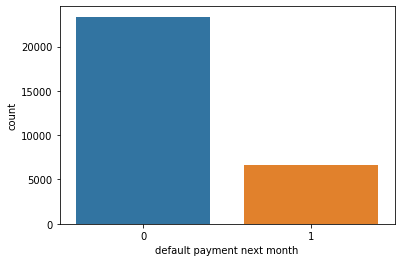

In [ ]:
#Plotinfg the target columns
sns.countplot(x= df_news['default payment next month'])

##**Gender Relationship**

In [ ]:
#Checking count
#Gender (1 = male; 2 = female).
df_news.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

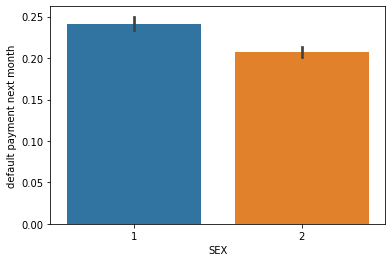

In [ ]:
#Plotting the Graphical representation of sex
fig, ax = plt.subplots()
sns.barplot(x= 'SEX', y='default payment next month', data= df_news)
plt.show()

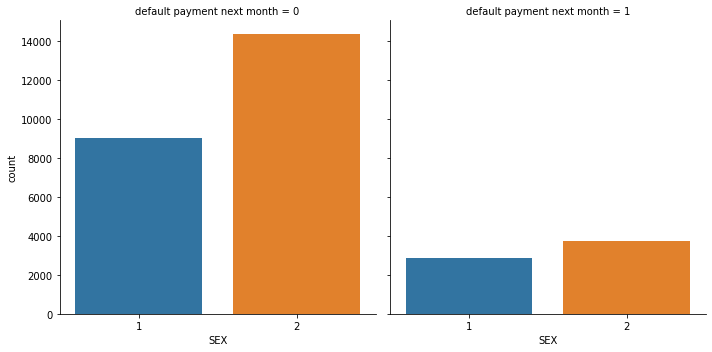

In [ ]:
g = sns.catplot(x="SEX", col="default payment next month",
                data=df_news, kind="count");

##**Marriage**

In [ ]:
#Checking Counts
#Marital status (1 = married; 2 = single; 3&0 = others).
df_news.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

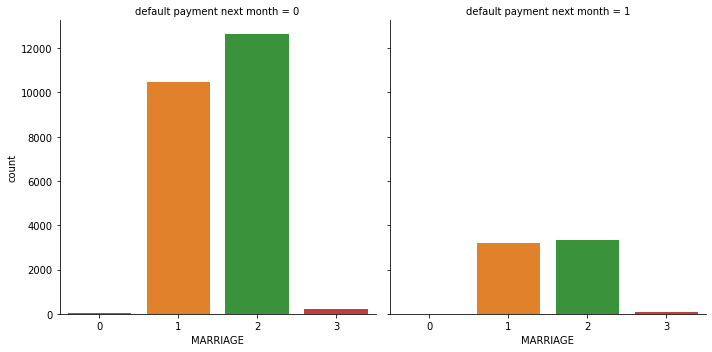

In [ ]:
#Ploting the marriage count 
sns.catplot(x="MARRIAGE", col="default payment next month",
                data=df_news, kind="count");

##**Educatiuon**

In [ ]:
#Checking counts
#Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
df_news.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

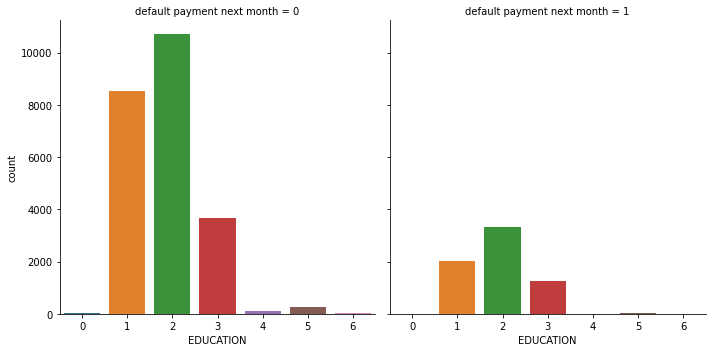

In [ ]:
#Plotting the education 
#Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).6sns.catplot(x="EDUCATION", col="default payment next month",
sns.catplot(x="EDUCATION", col="default payment next month",
                data=df_news, kind="count");

##**Limit Balance**

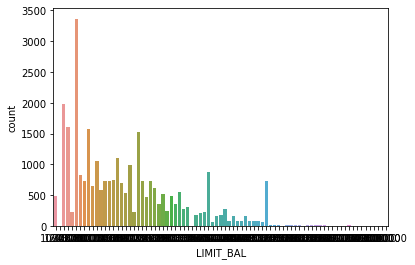

In [ ]:
#Plotting the Limit balance
sns.countplot(x=df_news.LIMIT_BAL)

In [ ]:
df_news.LIMIT_BAL.describe()


count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

##**Payment Status**

In [ ]:
#Making dataframe on Payment status
df_pay = df_news[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
df_pay.head()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
1,2,2,-1,-1,-2,-2
2,-1,2,0,0,0,2
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,-1,0,-1,0,0,0


In [ ]:
#Describtive analysis of Payment status columns
df_pay.describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


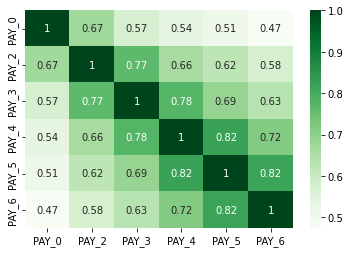

In [ ]:
sns.heatmap(df_pay.corr(),cmap='Greens', annot=True);

##**Bill Amount**

In [ ]:
#Creating columns for Bill Amount
df_bill = df_news[['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
df_bill.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
1,3913,3102,689,0,0,0
2,2682,1725,2682,3272,3455,3261
3,29239,14027,13559,14331,14948,15549
4,46990,48233,49291,28314,28959,29547
5,8617,5670,35835,20940,19146,19131


In [ ]:
#Describtive analysis of Bill Amount
df_bill.describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


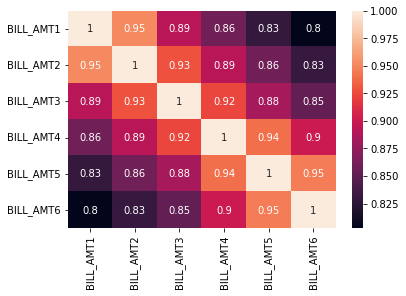

In [ ]:
#Ploting the plot of correlation on bill amount
sns.heatmap(df_bill.corr(), annot=True);

##**Payment Amount**

In [ ]:
#Creating the dataframe for Payment amount
df_amt = df_news[['PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
df_amt.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
1,0,689,0,0,0,0
2,0,1000,1000,1000,0,2000
3,1518,1500,1000,1000,1000,5000
4,2000,2019,1200,1100,1069,1000
5,2000,36681,10000,9000,689,679


In [ ]:
#Descriptive analysis of payment amount
df_amt.describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


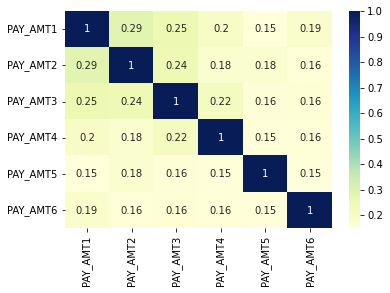

In [ ]:
#Plotting correlation relationship on Payment Amount
sns.heatmap(df_amt.corr(),cmap='YlGnBu', annot=True);

##**Age Distribution**

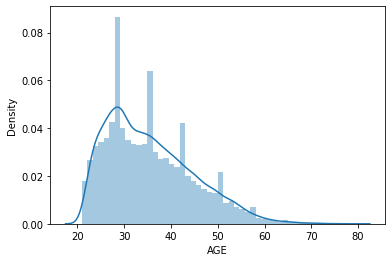

In [ ]:
#Ploting age foriable to get better understanding
sns.distplot(df_news.AGE)

##**Correlation of Features**

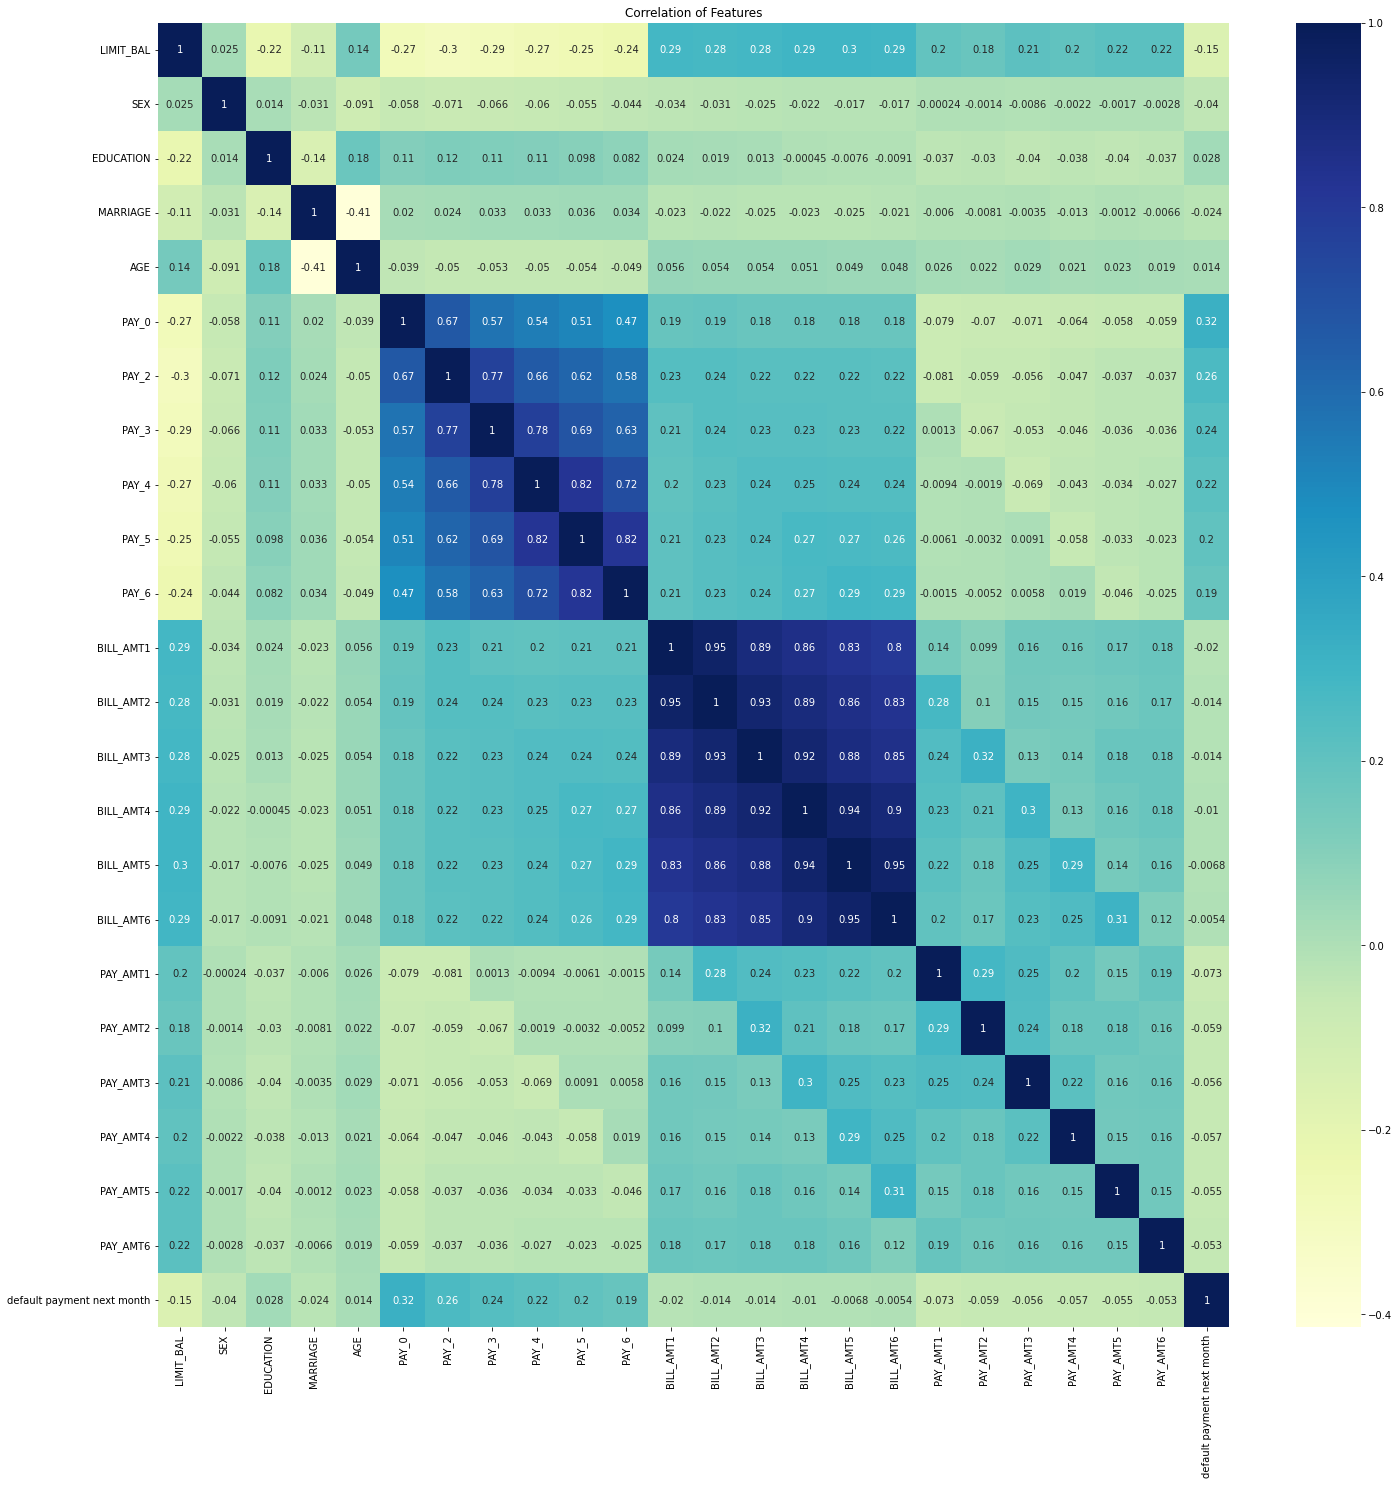

In [ ]:
#Finding the correlation among features
plt.subplots(figsize=(24,24))
plt.title("Correlation of Features")
sns.heatmap(df_news.corr(),cmap='YlGnBu', annot=True)

#**Model Traning**

##**Handling Imbalance**

In [ ]:
#Counting the target distribution
df_news['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [ ]:
#Handling imbalance dataset
from imblearn.over_sampling import SMOTE

smote = SMOTE()

#Defining x and y variable
x = df_news.drop('default payment next month', axis=1)
y = df_news['default payment next month']

#Fit predictor and target
x_sm, y_sm = smote.fit_resample(x,y)

print('Original data shape: ',len(y))
print('Resample data shape: ',len(y_sm))

Original data shape:  30000
Resample data shape:  46728


##**Scaling with Standard Scalar**

In [ ]:
#Scaling the features data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x_sm)
x_sm.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


##**Train Test Split**

In [ ]:
#Spliting train test split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_sm, y_sm, random_state=42, test_size=0.3)

##**Preprocessing for Traning Model**

In [ ]:
#Importing required libraries for evaluation
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

##**Logistic Regression**

In [ ]:
#Implimenting the Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

#Predicting with train model
yp_lr_train =  lr.predict(xtrain)
yp_lr_test = lr.predict(xtest)

#Evaluating the model
yp_lr_train_sc = classification_report(ytrain, yp_lr_train)
yp_lr_test_sc = classification_report(ytest, yp_lr_test)

#Printing the model eveluation metrics
print("Train score: \n",yp_lr_train_sc)
print('Test score : \n',yp_lr_test_sc)

Train score: 
               precision    recall  f1-score   support

           0       0.59      0.72      0.65     16359
           1       0.64      0.50      0.56     16350

    accuracy                           0.61     32709
   macro avg       0.62      0.61      0.61     32709
weighted avg       0.62      0.61      0.61     32709

Test score : 
               precision    recall  f1-score   support

           0       0.58      0.71      0.64      7005
           1       0.63      0.49      0.55      7014

    accuracy                           0.60     14019
   macro avg       0.61      0.60      0.60     14019
weighted avg       0.61      0.60      0.60     14019



##**Decision Tree**

In [ ]:
#Implimenting the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

#Predicting with trained model
yp_dt_train = dt.predict(xtrain)
yp_dt_test = dt.predict(xtest)

#Evaluating the model
yp_dt_train_sc = classification_report(ytrain,yp_dt_train)
yp_dt_test_sc = classification_report(ytest, yp_lr_test)

#Printing the model eveluation metrics
print('Train Score : \n',yp_dt_train_sc)
print('Test Score  :\n',yp_dt_test_sc)


Train Score : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16359
           1       1.00      1.00      1.00     16350

    accuracy                           1.00     32709
   macro avg       1.00      1.00      1.00     32709
weighted avg       1.00      1.00      1.00     32709

Test Score  :
               precision    recall  f1-score   support

           0       0.58      0.71      0.64      7005
           1       0.63      0.49      0.55      7014

    accuracy                           0.60     14019
   macro avg       0.61      0.60      0.60     14019
weighted avg       0.61      0.60      0.60     14019



##**Random Forest Classifier**

In [ ]:
#Implimenting the Decision Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)

#Predicting with trained model
yp_rf_train = rf.predict(xtrain)
yp_rf_test = rf.predict(xtest)

#Evaluating the model
yp_rf_train_sc = classification_report(ytrain,yp_rf_train)
yp_rf_test_sc = classification_report(ytest,yp_rf_test)

#Printing the model eveluation metrics
print('Train Score: \n',yp_rf_train_sc)
print('Test Score : \n',yp_dt_test_sc)

Train Score: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16359
           1       1.00      1.00      1.00     16350

    accuracy                           1.00     32709
   macro avg       1.00      1.00      1.00     32709
weighted avg       1.00      1.00      1.00     32709

Test Score : 
               precision    recall  f1-score   support

           0       0.58      0.71      0.64      7005
           1       0.63      0.49      0.55      7014

    accuracy                           0.60     14019
   macro avg       0.61      0.60      0.60     14019
weighted avg       0.61      0.60      0.60     14019



##**XGBoost Classifier**

In [ ]:
#Implimenting the XGBoost Classifier
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(xtrain,ytrain)

#Predicting with trained model
yp_xgb_train = xgb.predict(xtrain)
yp_xgb_test = xgb.predict(xtest)

#Evaluating the model
yp_xgb_train_sc = classification_report(yp_xgb_train, ytrain)
yp_xgb_test_sc = classification_report(yp_xgb_test,ytest)

#Printing the model eveluation metrics
print('Train Score: \n',yp_xgb_train_sc)
print('Test Score : \n',yp_xgb_test_sc)

Train Score: 
               precision    recall  f1-score   support

           0       0.82      0.77      0.79     17362
           1       0.76      0.81      0.78     15347

    accuracy                           0.79     32709
   macro avg       0.79      0.79      0.79     32709
weighted avg       0.79      0.79      0.79     32709

Test Score : 
               precision    recall  f1-score   support

           0       0.81      0.76      0.78      7475
           1       0.74      0.80      0.77      6544

    accuracy                           0.78     14019
   macro avg       0.78      0.78      0.78     14019
weighted avg       0.78      0.78      0.78     14019



##**Support Vector Machine**

In [ ]:
#Implimenting the Support Vector Machine Classifier
from sklearn.svm import SVC
svm = SVC()
svm.fit(xtrain,ytrain)

#Predicting with trained model
yp_svm_train = svm.predict(xtrain)
yp_svm_test = svm.predict(xtest)

#Evaluating the model
yp_svm_train_sc = classification_report(yp_svm_train,ytrain)
yp_svm_test_sc = classification_report(yp_svm_test, ytest)

#Printing the model eveluation metrics
print('Train Score: \n',yp_svm_train_sc)
print('Test Score : \n',yp_svm_test_sc)

Train Score: 
               precision    recall  f1-score   support

           0       0.57      0.65      0.60     14400
           1       0.69      0.61      0.65     18309

    accuracy                           0.63     32709
   macro avg       0.63      0.63      0.63     32709
weighted avg       0.63      0.63      0.63     32709

Test Score : 
               precision    recall  f1-score   support

           0       0.55      0.63      0.59      6153
           1       0.67      0.60      0.63      7866

    accuracy                           0.61     14019
   macro avg       0.61      0.61      0.61     14019
weighted avg       0.62      0.61      0.61     14019



##**Artificial Neural Networks**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
#Model Building
def create_ann():
  model_ann = Sequential()
  model_ann.add(Dense(28, input_shape=(x.shape[1],), activation='relu'))
  model_ann.add(Dense(28, activation='relu'))
  model_ann.add(Dense(12,activation='relu'))
  model_ann.add(Dense(1, activation='sigmoid'))
  model_ann.summary()

  model_ann.compile(optimizer='Adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

  return model_ann

model_ann = KerasClassifier(build_fn=create_ann)

In [ ]:
model_ann = KerasClassifier(build_fn=create_ann)
model_ann.fit(xtrain,ytrain)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28)                672       
                                                                 
 dense_1 (Dense)             (None, 28)                812       
                                                                 
 dense_2 (Dense)             (None, 12)                348       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 1,845
Trainable params: 1,845
Non-trainable params: 0
_________________________________________________________________
1023/1023 [==============================] - 3s 2ms/step - loss: 69.7353 - accuracy: 0.5049


In [ ]:
#Predicting with trained model
yp_ann_train = np.round(model_ann.predict(xtrain),0)
yp_ann_test = np.round(model_ann.predict(xtest),0)



#Evaluating the model
yp_ann_train_sc = classification_report(yp_ann_train,ytrain)
yp_ann_test_sc = classification_report(yp_ann_test, ytest)

#Printing the model eveluation metrics
print('Train Score: \n',yp_ann_train_sc)
print('Test Score : \n',yp_ann_test_sc)

Train Score: 
               precision    recall  f1-score   support

           0       0.01      0.57      0.02       249
           1       0.99      0.50      0.67     32460

    accuracy                           0.50     32709
   macro avg       0.50      0.53      0.34     32709
weighted avg       0.99      0.50      0.66     32709

Test Score : 
               precision    recall  f1-score   support

           0       0.01      0.59      0.02       111
           1       0.99      0.50      0.67     13908

    accuracy                           0.50     14019
   macro avg       0.50      0.54      0.34     14019
weighted avg       0.99      0.50      0.66     14019



#**Model HyperTuning**

##**Parameter Initialization**

In [ ]:
#Importing GridsearchCV
from sklearn.model_selection import GridSearchCV


#object initilization for hypertuning
param_dict_lr = {
    'C':[1e-3,1e-2,1e-1,1,10,100,1e+3]
}

param_dict_dt = {
    'criterion':['gini','entropy'],
    'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]
}

param_dict_rf = {
    'max_depth':[4,6,8],
    'min_samples_leaf':[40, 60],
    'min_samples_split':[50,100,150],
    'n_estimators':[50, 80, 100]
}

param_dict_xgb = {
    'max_depth':[2,10,1],
    'n_estimators':range(60,220,40),
    'learning_rate' : [0.1, 0.05, 0.005,0.0005]
}

param_dict_svm = {
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['rbf', 'Polynomial','Sigmoid','Linear']
}
param_dict_ann = {
    'batch_size' :[10, 20, 40, 60, 80, 100],
    'epochs' : [10, 30, 50]    
}

##**Hypertuning Logistic Regression With GridSearchCV**





In [ ]:
#Implimenting GridsearchCV with Predefined Parameter
lr_grid = GridSearchCV(estimator=lr,
                       param_grid= param_dict_lr,
                       cv=3, verbose=3, scoring='roc_auc')
lr_grid.fit(xtrain,ytrain)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV 1/3] END ...........................C=0.001;, score=0.666 total time=   0.6s
[CV 2/3] END ...........................C=0.001;, score=0.659 total time=   0.6s
[CV 3/3] END ...........................C=0.001;, score=0.645 total time=   0.6s
[CV 1/3] END ............................C=0.01;, score=0.666 total time=   0.6s
[CV 2/3] END ............................C=0.01;, score=0.676 total time=   0.6s
[CV 3/3] END ............................C=0.01;, score=0.644 total time=   0.6s
[CV 1/3] END .............................C=0.1;, score=0.664 total time=   0.6s
[CV 2/3] END .............................C=0.1;, score=0.658 total time=   0.5s
[CV 3/3] END .............................C=0.1;, score=0.645 total time=   0.6s
[CV 1/3] END ...............................C=1;, score=0.665 total time=   0.6s
[CV 2/3] END ...............................C=1;, score=0.657 total time=   0.6s
[CV 3/3] END ...............................C=1;,

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000.0]},
             scoring='roc_auc', verbose=3)

In [ ]:
#Evaluating model of train 
print('Train Score: ',lr_grid.best_estimator_.score(xtrain,ytrain))
print('Test Score : ',lr_grid.best_estimator_.score(xtest,ytest))

Train Score:  0.6172001589776515
Test Score :  0.6130965118767387


In [ ]:
#Selecting the best parameters
lr_grid.best_params_

{'C': 0.1}

##**Hypertuning Decision Tree With GridSearchCV**


In [ ]:
#Implimenting GridsearchCV with Predefined Parameter
dt_grid = GridSearchCV(estimator=dt,
                       param_grid=param_dict_dt,
                       cv = 3, verbose=3, scoring='roc_auc')

#Fitting the hypertuned model
dt_grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END .......criterion=gini, max_depth=4;, score=0.787 total time=   0.3s
[CV 2/5] END .......criterion=gini, max_depth=4;, score=0.796 total time=   0.3s
[CV 3/5] END .......criterion=gini, max_depth=4;, score=0.786 total time=   0.3s
[CV 4/5] END .......criterion=gini, max_depth=4;, score=0.782 total time=   0.3s
[CV 5/5] END .......criterion=gini, max_depth=4;, score=0.778 total time=   0.3s
[CV 1/5] END .......criterion=gini, max_depth=5;, score=0.797 total time=   0.4s
[CV 2/5] END .......criterion=gini, max_depth=5;, score=0.812 total time=   0.4s
[CV 3/5] END .......criterion=gini, max_depth=5;, score=0.798 total time=   0.4s
[CV 4/5] END .......criterion=gini, max_depth=5;, score=0.794 total time=   0.4s
[CV 5/5] END .......criterion=gini, max_depth=5;, score=0.790 total time=   0.3s
[CV 1/5] END .......criterion=gini, max_depth=6;, score=0.804 total time=   0.4s
[CV 2/5] END .......criterion=gini, max_depth=6

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]},
             scoring='roc_auc', verbose=3)

In [ ]:
#Evaluating the trained decision tree with gridsearchCV
print('Train Score: ',dt_grid.best_estimator_.score(xtrain,ytrain))
print('Test Score : ',dt_grid.best_estimator_.score(xtest,ytest))

Train Score:  0.7753523495062521
Test Score :  0.7504101576431985


In [ ]:
#Selecting the best parameters
dt_grid.best_params_

{'criterion': 'entropy', 'max_depth': 9}

##**Hypertuning Random Forest With GridSearchCV**


In [ ]:
#Implimenting GridsearchCV with Predefined Parameter
rf_grid = GridSearchCV(estimator=rf,
                       param_grid=param_dict_rf,
                       cv = 3, verbose=3, scoring='roc_auc')

#Fitting tuned model
rf_grid.fit(xtrain,ytrain)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV 1/3] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50;, score=0.819 total time=   1.6s
[CV 2/3] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50;, score=0.814 total time=   1.6s
[CV 3/3] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50;, score=0.804 total time=   1.6s
[CV 1/3] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80;, score=0.821 total time=   2.4s
[CV 2/3] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80;, score=0.814 total time=   2.1s
[CV 3/3] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80;, score=0.802 total time=   1.7s
[CV 1/3] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100;, score=0.821 total time=   2.1s
[CV 2/3] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100;, score=0.815 total time=

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 60],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='roc_auc', verbose=3)

In [ ]:
#Evaluating the model train with random forest
print('Train Score:', rf_grid.best_estimator_.score(xtrain,ytrain))
print('Test Score :',rf_grid.best_estimator_.score(xtest,ytest))

Train Score: 0.7746491791250114
Test Score : 0.762037235180826


In [ ]:
#Checking best estimator
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 80}

##**Hypertuning XGBoost With GridSearchCV**


In [ ]:
#Implimenting GridsearchCV with Predefined Parameter
xgb_grid = GridSearchCV(estimator=xgb,
                        param_grid=param_dict_xgb,
                        cv = 3, verbose=3,scoring='roc_auc')

#Fitting tuned model with dataset
xgb_grid.fit(xtrain,ytrain)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END learning_rate=0.1, max_depth=2, n_estimators=60;, score=0.837 total time=   1.1s
[CV 2/3] END learning_rate=0.1, max_depth=2, n_estimators=60;, score=0.830 total time=   1.2s
[CV 3/3] END learning_rate=0.1, max_depth=2, n_estimators=60;, score=0.823 total time=   1.1s
[CV 1/3] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.846 total time=   1.8s
[CV 2/3] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.840 total time=   2.0s
[CV 3/3] END learning_rate=0.1, max_depth=2, n_estimators=100;, score=0.831 total time=   2.2s
[CV 1/3] END learning_rate=0.1, max_depth=2, n_estimators=140;, score=0.855 total time=   3.1s
[CV 2/3] END learning_rate=0.1, max_depth=2, n_estimators=140;, score=0.847 total time=   3.6s
[CV 3/3] END learning_rate=0.1, max_depth=2, n_estimators=140;, score=0.838 total time=   3.6s
[CV 1/3] END learning_rate=0.1, max_depth=2, n_estimators=180;, score=0.861 total time

GridSearchCV(cv=3, estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.005, 0.0005],
                         'max_depth': [2, 10, 1],
                         'n_estimators': range(60, 220, 40)},
             scoring='roc_auc', verbose=3)

In [ ]:
#Evaluating the tranined model
print('Train Score:',xgb_grid.best_estimator_.score(xtrain,ytrain))
print('Test Score :',xgb_grid.best_estimator_.score(xtest,ytest))

Train Score: 0.9737992601424684
Test Score : 0.8390755403381126


In [ ]:
#Checking best params
xgb_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 180}

##**Hypertuning Support Vector Machine With GridSearchCV**


In [ ]:
#Implimenting Gridsearchcv with SVM
svm_grid = GridSearchCV(estimator=svm,
                        param_grid=param_dict_svm,
                        cv=3,verbose=3,scoring='roc_auc')

#Fitting tuned model with datasets
svm_grid.fit(xtrain,ytrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.520 total time= 1.0min
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.520 total time=  43.3s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.522 total time=  43.8s
[CV 1/3] END ...C=0.1, gamma=1, kernel=Polynomial;, score=nan total time=   0.0s
[CV 2/3] END ...C=0.1, gamma=1, kernel=Polynomial;, score=nan total time=   0.0s
[CV 3/3] END ...C=0.1, gamma=1, kernel=Polynomial;, score=nan total time=   0.0s
[CV 1/3] END ......C=0.1, gamma=1, kernel=Sigmoid;, score=nan total time=   0.0s
[CV 2/3] END ......C=0.1, gamma=1, kernel=Sigmoid;, score=nan total time=   0.0s
[CV 3/3] END ......C=0.1, gamma=1, kernel=Sigmoid;, score=nan total time=   0.0s
[CV 1/3] END .......C=0.1, gamma=1, kernel=Linear;, score=nan total time=   0.0s
[CV 2/3] END .......C=0.1, gamma=1, kernel=Linear;, score=nan total time=   0.0s
[CV 3/3] END .......C=0.1, gamma=1, kernel=Lin

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'Polynomial', 'Sigmoid', 'Linear']},
             scoring='roc_auc', verbose=3)

In [ ]:
#Evaluating the model
print('Train Score: ',svm_grid.best_estimator_.score(xtrain,ytrain))
print('Test Score :', svm_grid.best_estimator_.score(xtest,ytest))

Train Score:  0.9927542878106943
Test Score : 0.5745773592980954


In [ ]:
#Checking best params
svm_grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

##**Hypertuning Artificial Nueral Network With GridSearchCV**



In [ ]:
#Implimenting Gridsearchcv with SVM
ann_grid = GridSearchCV(estimator=model_ann,
                        param_grid=param_dict_ann,
                        cv=3,verbose=3,scoring='roc_auc')

#Fitting tuned model with datasets
ann_grid.fit(x,y)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 28)                672       
                                                                 
 dense_5 (Dense)             (None, 28)                812       
                                                                 
 dense_6 (Dense)             (None, 12)                348       
                                                                 
 dense_7 (Dense)             (None, 1)                 13        
                                                                 
Total params: 1,845
Trainable params: 1,845
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
2000/2000 [==============================] - 4s 2ms/step - loss: 571.1227 - accuracy: 0.6859
Epoch 2/10
2000/200

GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f9790b93710>,
             param_grid={'batch_size': [10, 20, 40, 60, 80, 100],
                         'epochs': [10, 30, 50]},
             scoring='roc_auc', verbose=3)

In [ ]:
#Evaluating the model
print('Train Score: ',ann_grid.best_estimator_.score(xtrain,ytrain))
print('Test Score : ', ann_grid.best_estimator_.score(xtest,ytest))

546/546 [==============================] - 2s 3ms/step - loss: 11.7931 - accuracy: 0.5717
Train Score:  0.5717386603355408
234/234 [==============================] - 1s 3ms/step - loss: 11.2842 - accuracy: 0.5712
Test Score :  0.571153461933136


In [ ]:
#Checking best params
ann_grid.best_params_

{'batch_size': 60, 'epochs': 10}

#**Model Evaluation And Selection**

In [ ]:
#Traning the model with Hypertuned params
lr = LogisticRegression(C= 0.1)
dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 9)
rf = RandomForestClassifier(max_depth= 8,
                            min_samples_leaf= 40,
                            min_samples_split= 50,
                            n_estimators= 80)
xgb = XGBClassifier(learning_rate= 0.1, max_depth= 10, n_estimators= 180)
svm = SVC(C= 1000, gamma= 0.0001, kernel= 'rbf')
ann = KerasClassifier(build_fn=create_ann)

In [ ]:
#Collecting the result of all trained model
models = [lr,dt,rf,xgb,svm,ann]

def model_metrics(models,xtrain, xtest, ytrain, ytest):
  cols = ['Train Accuracy','Test Accuracy','Train Precision', 'Test Precision','Train Recall', 'Test Recall', 'Train F1 Score','Test F1 Score','Train ROC-AUC','Test ROC AUC']
  model_df = pd.DataFrame(columns=cols)
  conf_train, conf_test = {}, {}

  i = 0
  for model in models:
    model.fit(xtrain, ytrain)
    y_pred_train = model.predict(xtrain)
    y_pred_test = model.predict(xtest)

    model_df.loc[i, 'Train Accuracy'] = accuracy_score(ytrain,y_pred_train).round(2)
    model_df.loc[i, 'Test Accuracy'] = accuracy_score(ytest, y_pred_test).round(2)
    model_df.loc[i, 'Train Precision'] = precision_score(ytrain, y_pred_train).round(2)
    model_df.loc[i, 'Test Precision'] = precision_score(ytest, y_pred_test).round(2)
    model_df.loc[i, 'Train Recall'] = recall_score(ytrain, y_pred_train).round(2)
    model_df.loc[i, 'Test Recall'] = recall_score(ytest, y_pred_test)
    model_df.loc[i, 'Train F1 Score'] = f1_score(ytrain, y_pred_train)
    model_df.loc[i, 'Test F1 Score'] = f1_score(ytest, y_pred_test )
    model_df.loc[i, 'Train ROC-AUC'] = roc_auc_score(ytrain, y_pred_train)
    model_df.loc[i, 'Test ROC AUC'] = roc_auc_score(ytest, y_pred_test)

    conf_train[model.__class__.__name__] = confusion_matrix(ytrain, y_pred_train)
    conf_test[model.__class__.__name__] = confusion_matrix(ytest, y_pred_test)

    i +=1
  return model_df, conf_train, conf_test

In [ ]:
#Fitting data with defined function
model_df,conf_train, conf_test = model_metrics(models,xtrain,xtest,ytrain,ytest)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 28)                672       
                                                                 
 dense_5 (Dense)             (None, 28)                812       
                                                                 
 dense_6 (Dense)             (None, 12)                348       
                                                                 
 dense_7 (Dense)             (None, 1)                 13        
                                                                 
Total params: 1,845
Trainable params: 1,845
Non-trainable params: 0
_________________________________________________________________
1023/1023 [==============================] - 2s 2ms/step - loss: 129.7248 - accuracy: 0.5425


In [ ]:
#Comparitive analysis with derived result
model = {'Model':['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','XGBClassifier','SVM','Artificial Neural Networks']}
model = pd.DataFrame(model)
model = pd.concat([model,model_df],axis=1)
model_m = model.set_index('Model')
model_m

,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score,Train ROC-AUC,Test ROC AUC
Model,,,,,,,,,,
Logistic Regression,0.61,0.6,0.64,0.63,0.49,0.48061,0.55571,0.545867,0.608638,0.599977
Decision Tree Classifier,0.78,0.75,0.78,0.75,0.76,0.733961,0.773649,0.744146,0.776877,0.747494
Random Forest Classifier,0.77,0.76,0.81,0.8,0.72,0.705161,0.76103,0.74894,0.774939,0.763501
XGBClassifier,0.98,0.84,0.98,0.86,0.97,0.813944,0.977496,0.835076,0.97765,0.839163
SVM,0.99,0.57,0.99,0.91,1.0,0.159253,0.992848,0.271182,0.992817,0.571989
Artificial Neural Networks,0.55,0.55,0.53,0.53,0.91,0.909609,0.670592,0.669079,0.553676,0.549594


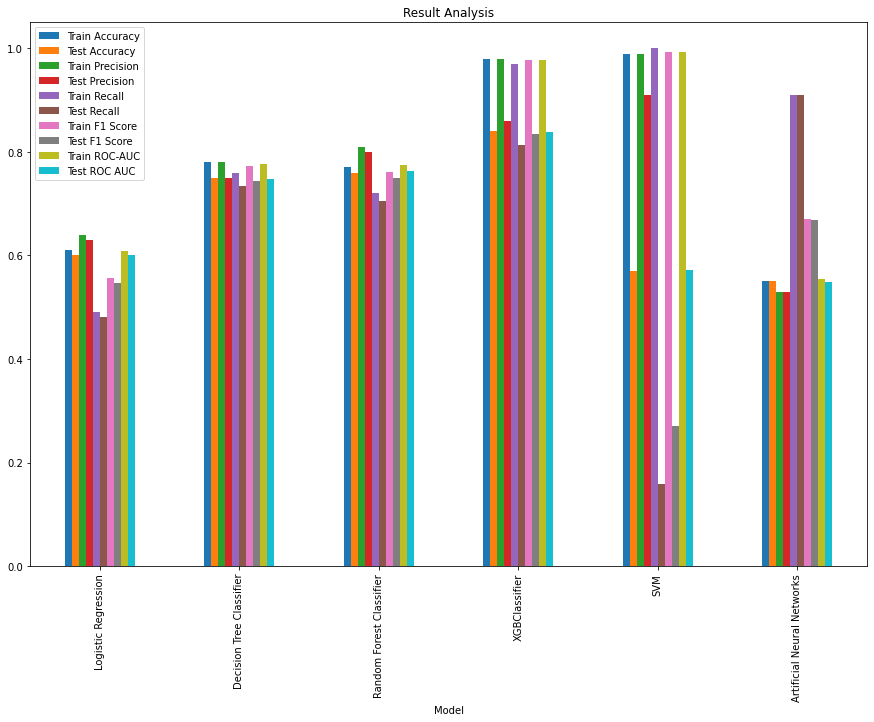

In [ ]:
#Ploting the hypertuned result
model.plot(x='Model',y=['Train Accuracy', 'Test Accuracy', 'Train Precision', 'Test Precision',
       'Train Recall', 'Test Recall', 'Train F1 Score', 'Test F1 Score',
       'Train ROC-AUC', 'Test ROC AUC'], kind='bar',title = 'Result Analysis', figsize=(15,10))

In [ ]:
#Printing the confusion metrics of all trained dataset
for key, value in conf_train.items():
  print(f'Confusion Matrix for Traning in  {key}:\n {value}')

In [ ]:
#Printing the confusion for trained dataset
for key, value in conf_train.items():
  print(f'Confusion Matrix for Training in {key}:\n{value}')

Confusion Matrix for Training in LogisticRegression:
[[11904  4455]
 [ 8345  8005]]
Confusion Matrix for Training in DecisionTreeClassifier:
[[12939  3420]
 [ 3878 12472]]
Confusion Matrix for Training in RandomForestClassifier:
[[13627  2732]
 [ 4629 11721]]
Confusion Matrix for Training in XGBClassifier:
[[16102   257]
 [  474 15876]]
Confusion Matrix for Training in SVC:
[[16163   196]
 [   39 16311]]
Confusion Matrix for Training in KerasClassifier:
[[ 3244 13115]
 [ 1487 14863]]


In [ ]:
#Print the confusion for test dataset
for key, value in conf_test.items():
  print(f'Confusion Matrix for Testing {key}:\n{value}')

Confusion Matrix for Testing LogisticRegression:
[[5039 1966]
 [3643 3371]]
Confusion Matrix for Testing DecisionTreeClassifier:
[[5331 1674]
 [1866 5148]]
Confusion Matrix for Testing RandomForestClassifier:
[[5757 1248]
 [2068 4946]]
Confusion Matrix for Testing XGBClassifier:
[[6055  950]
 [1305 5709]]
Confusion Matrix for Testing SVC:
[[6898  107]
 [5897 1117]]
Confusion Matrix for Testing KerasClassifier:
[[1328 5677]
 [ 634 6380]]


#**Conclusion**


1.   In conclusion, we can conclude that XGBoost is the best model for the present problem.
2.   This model solves the problem with high accuracy than others. It has the precision and recall scores of 81%  and 86% respectively, which is the highest among other models. 
3.   The next best models are the Random Forest classifier and Decision Tree classifier respectively. It sustains a generalized status as having low variance and low bias. 
4.   The most overfitted model is the Support Vector Machine, which has low bias and high variance.



